In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('insurance_part2_data.csv')

In [4]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
df.shape

(3000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [7]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [8]:
df.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [9]:
for column in df[['Agency_Code','Type','Claimed','Channel','Product Name','Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




In [9]:
for column in df[['Age','Commision','Duration','Sales']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGE :  70
8       1
14      1
83      1
77      1
84      1
     ... 
35     94
30     96
48    108
31    125
36    999
Name: Age, Length: 70, dtype: int64


COMMISION :  324
126.75       1
12.45        1
46.80        1
21.35        1
17.55        1
          ... 
7.70        57
23.76       61
54.00       61
63.21       62
0.00      1366
Name: Commision, Length: 324, dtype: int64


DURATION :  257
4580     1
149      1
141      1
215      1
217      1
        ..
11      81
10      81
6       81
5       82
8       83
Name: Duration, Length: 257, dtype: int64


SALES :  380
271.00      1
62.40       1
491.50      1
159.00      1
100.50      1
         ... 
216.00     59
252.85     60
22.00      79
10.00     163
20.00     225
Name: Sales, Length: 380, dtype: int64




In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [11]:
df.drop_duplicates(inplace=True) 

In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(2861, 10)


In [13]:
df.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,2861.000000,2861,2861,2861,2861.000000,2861,2861.000000,2861.000000,2861,2861
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1238,1709,1947,NaN,2815,NaN,NaN,1071,2327
mean,38.204124,NaN,NaN,NaN,15.080996,NaN,72.120238,61.757878,NaN,NaN
std,10.678106,NaN,NaN,NaN,25.826834,NaN,135.977200,71.399740,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,31.000000,NaN,NaN,NaN,0.000000,NaN,12.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,5.630000,NaN,28.000000,33.500000,NaN,NaN
75%,43.000000,NaN,NaN,NaN,17.820000,NaN,66.000000,69.300000,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BBB5608>,
      dtype=object)

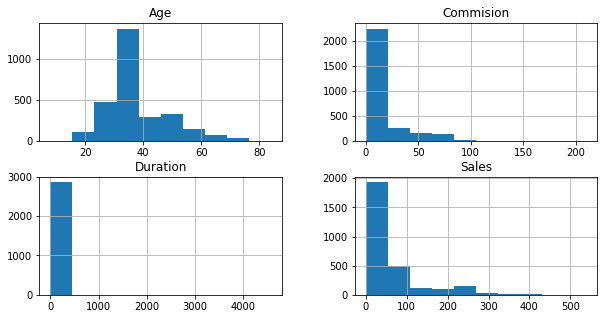

In [14]:
df.hist(figsize=(10,5))

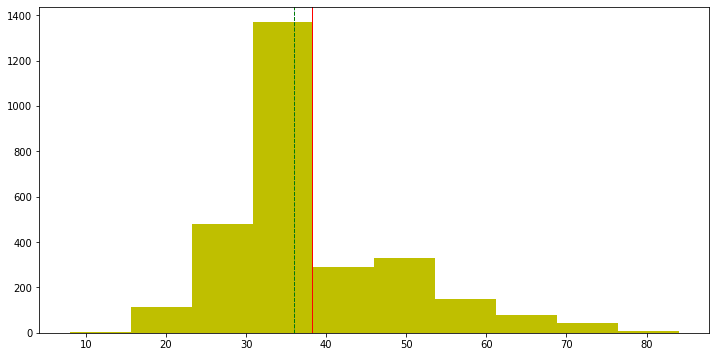

In [15]:
plt.figure(figsize=(12,6)) 
plt.hist(df['Age'], color='y') 
plt.axvline(df['Age'].mean(), color='r', linewidth=1)
plt.axvline(df['Age'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['Age'].mode()[0], color='g', linestyle='dashed', linewidth=1)


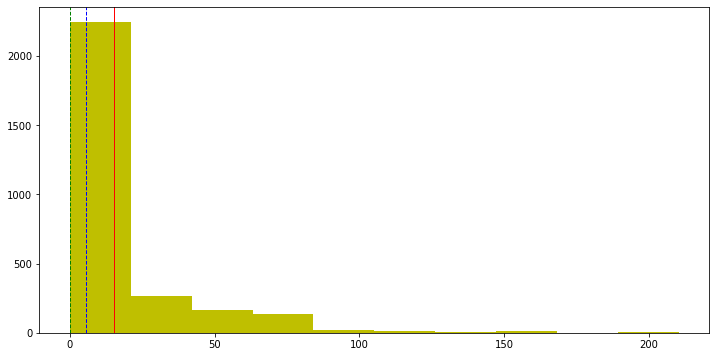

In [16]:
plt.figure(figsize=(12,6)) 
plt.hist(df['Commision'], color='y') 
plt.axvline(df['Commision'].mean(), color='r', linewidth=1)
plt.axvline(df['Commision'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['Commision'].mode()[0], color='g', linestyle='dashed', linewidth=1)

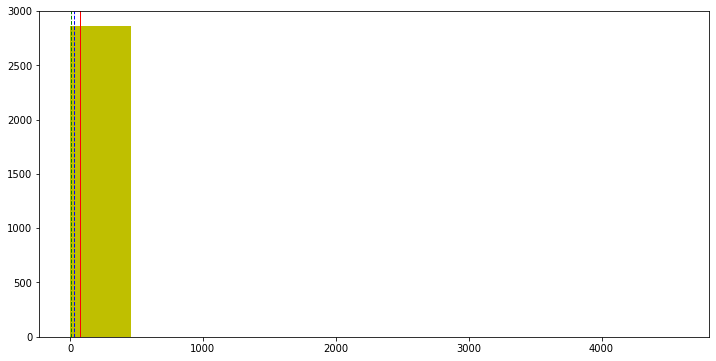

In [17]:
plt.figure(figsize=(12,6)) 
plt.hist(df['Duration'], color='y') 
plt.axvline(df['Duration'].mean(), color='r', linewidth=1)
plt.axvline(df['Duration'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['Duration'].mode()[0], color='g', linestyle='dashed', linewidth=1)

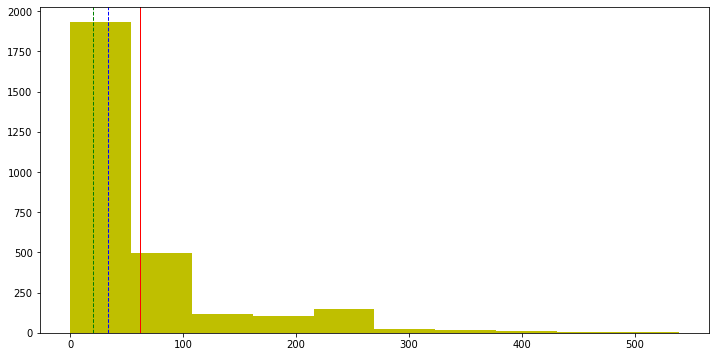

In [18]:
plt.figure(figsize=(12,6)) 
plt.hist(df['Sales'], color='y') 
plt.axvline(df['Sales'].mean(), color='r', linewidth=1)
plt.axvline(df['Sales'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['Sales'].mode()[0], color='g', linestyle='dashed', linewidth=1)

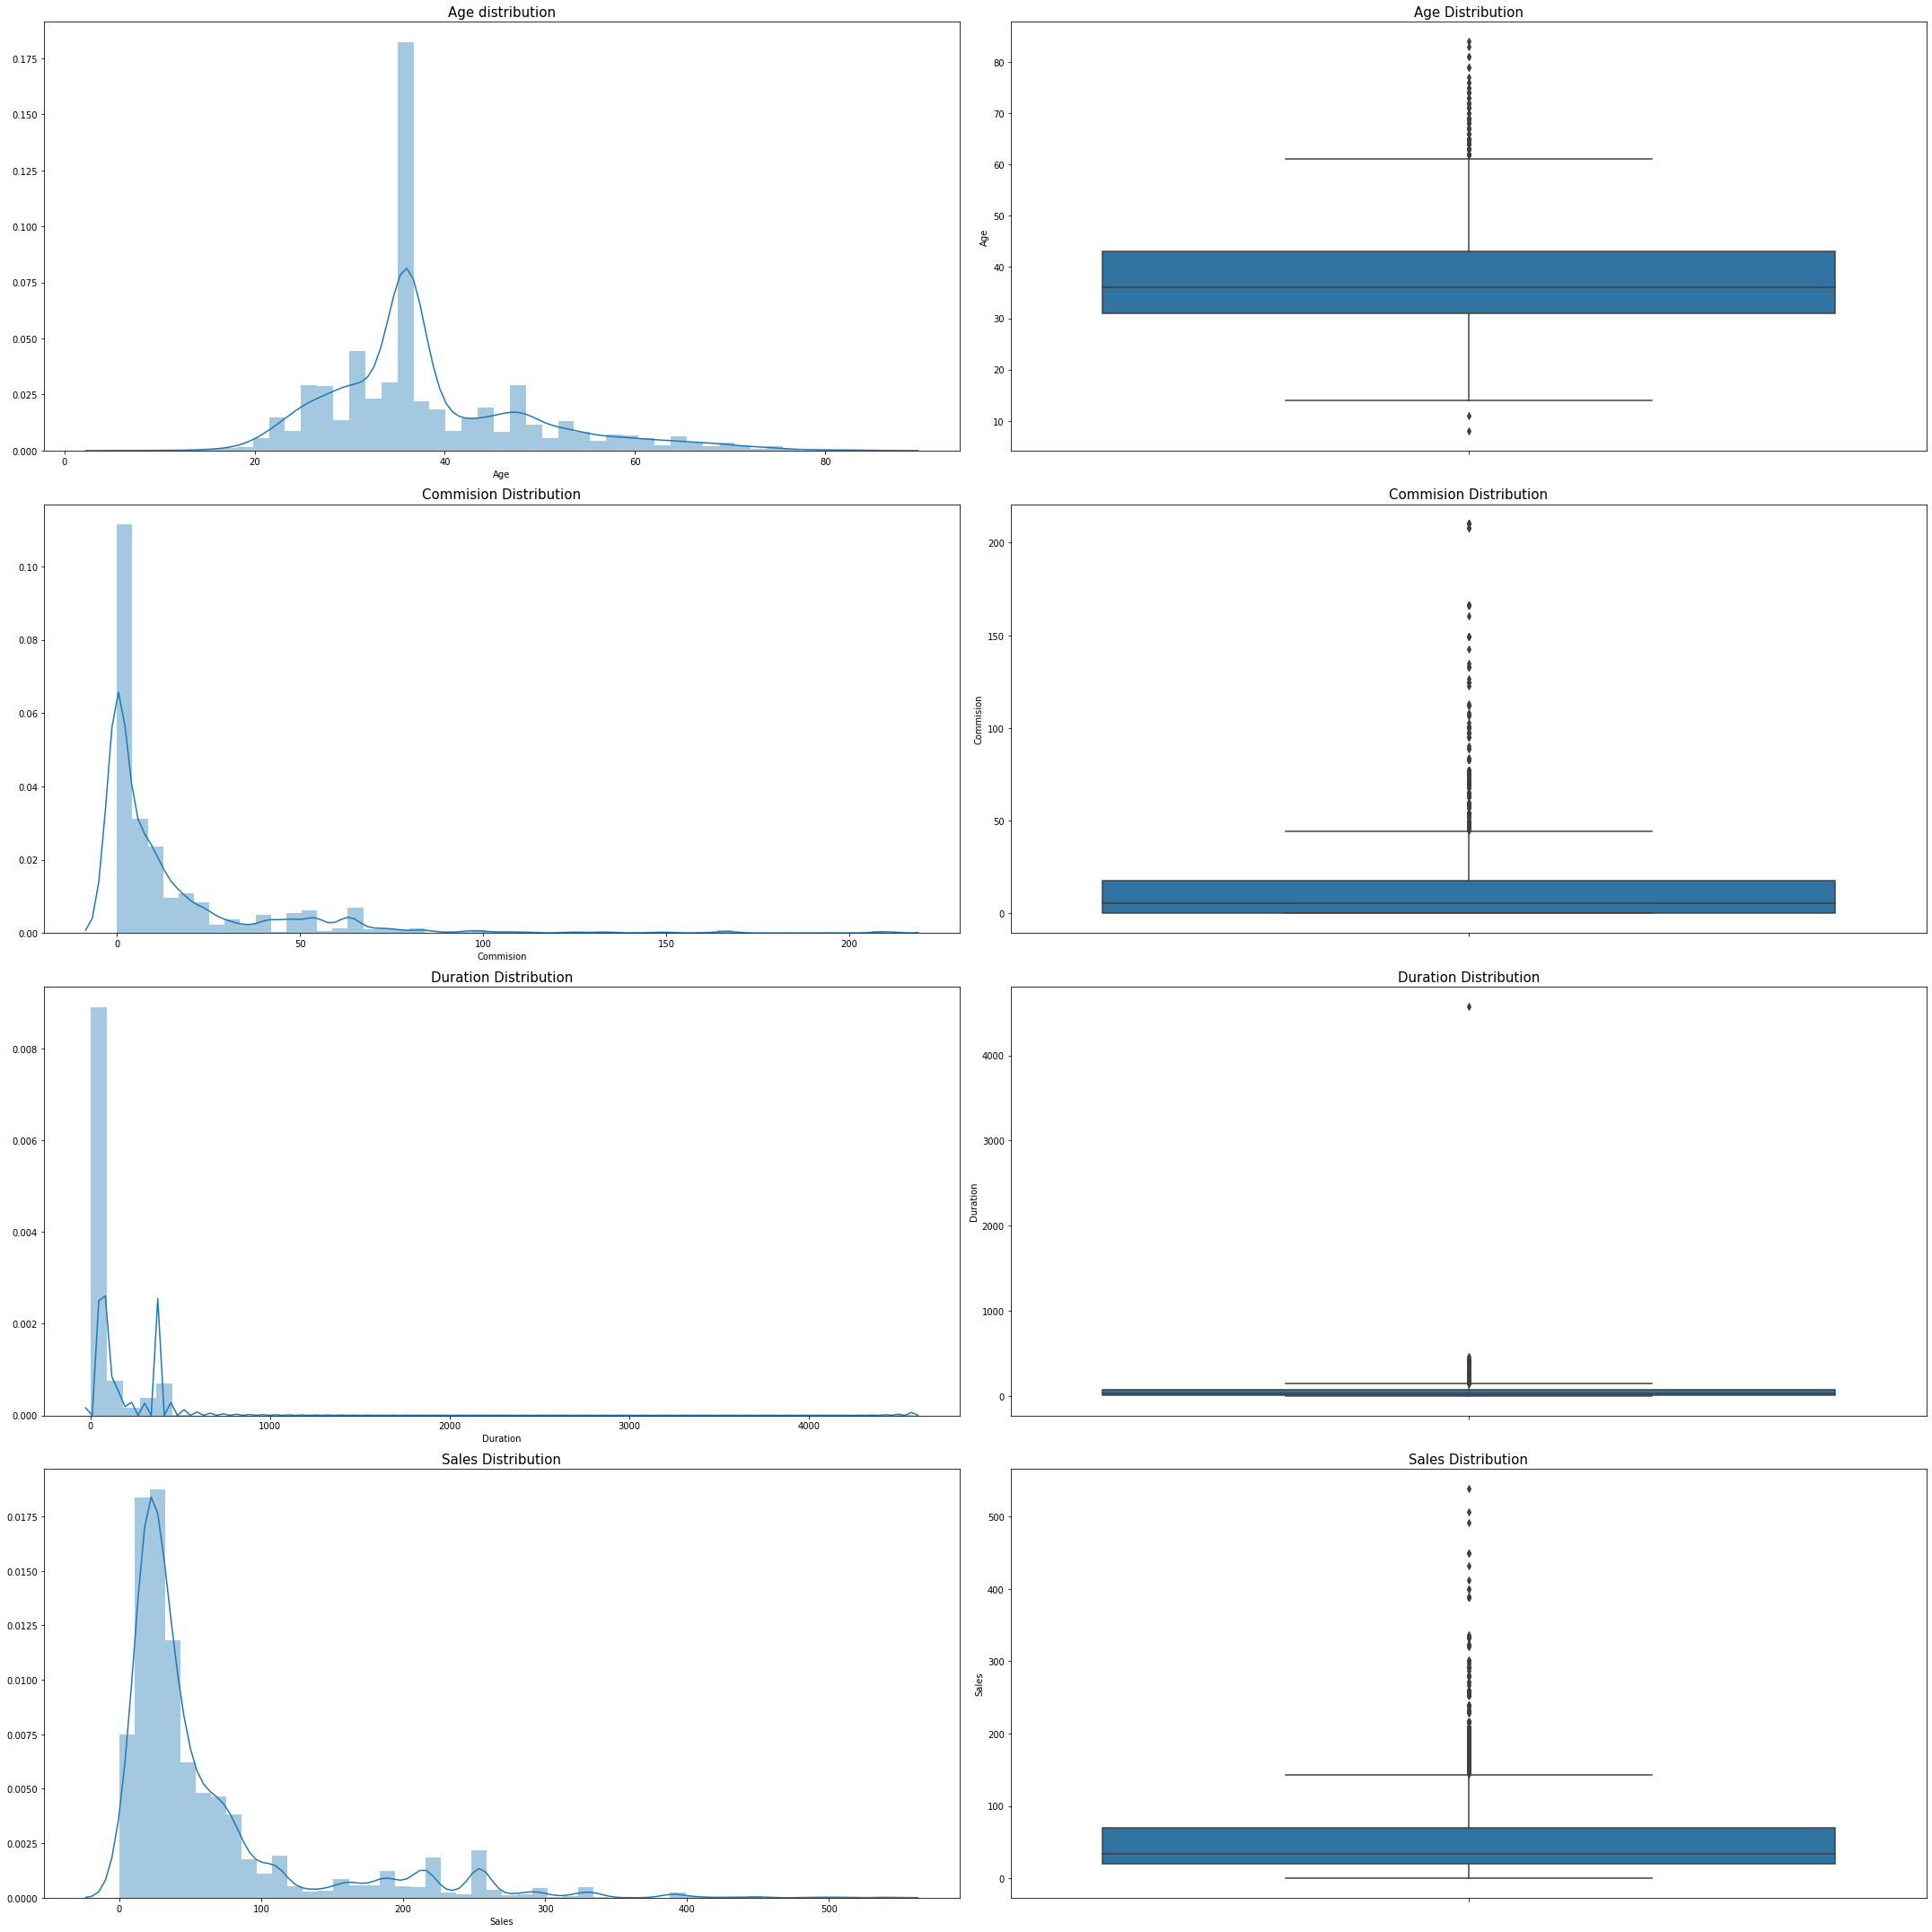

In [19]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(30,30)

a = sns.distplot(df['Age'] , ax=axes[0][0])
a.set_title("Age distribution",fontsize=15)

a = sns.boxplot(df['Age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age Distribution",fontsize=15)

a = sns.distplot(df['Commision'] , ax=axes[1][0])
a.set_title("Commision Distribution",fontsize=15)

a = sns.boxplot(df['Commision'] , orient = "v" , ax=axes[1][1])
a.set_title("Commision Distribution",fontsize=15)

a = sns.distplot(df['Duration'] , ax=axes[2][0])
a.set_title("Duration Distribution",fontsize=15)

a = sns.boxplot(df['Duration'] , orient = "v" , ax=axes[2][1])
a.set_title("Duration Distribution",fontsize=15)


a = sns.distplot(df['Sales'] , ax=axes[3][0])
a.set_title("Sales Distribution",fontsize=15)

a = sns.boxplot(df['Sales'] , orient = "v" , ax=axes[3][1])
a.set_title("Sales Distribution",fontsize=15)

plt.tight_layout()
plt.show()

In [21]:
df.skew()

Age           1.103145
Commision     3.104741
Duration     13.786096
Sales         2.344643
dtype: float64

In [22]:
df.corr()

,Age,Commision,Duration,Sales
Age,1.000000,0.064759,0.027457,0.036187
Commision,0.064759,1.000000,0.462114,0.762181
Duration,0.027457,0.462114,1.000000,0.549889
Sales,0.036187,0.762181,0.549889,1.000000


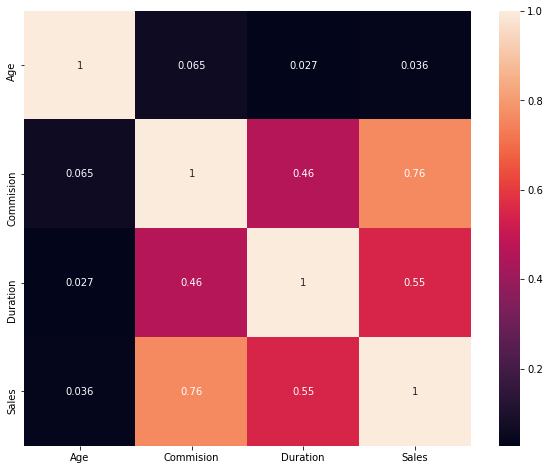

In [23]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot = True)

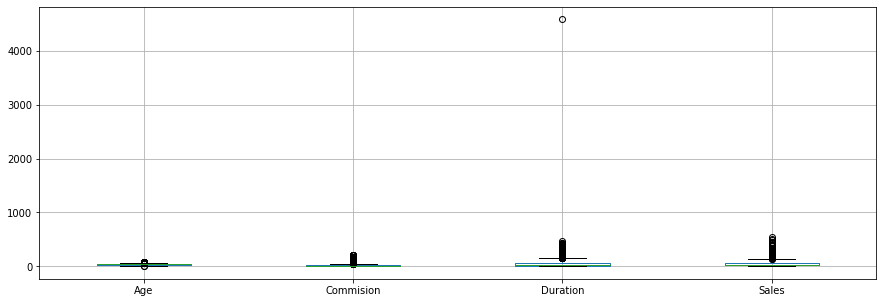

In [23]:
df.boxplot(figsize=(15,5))

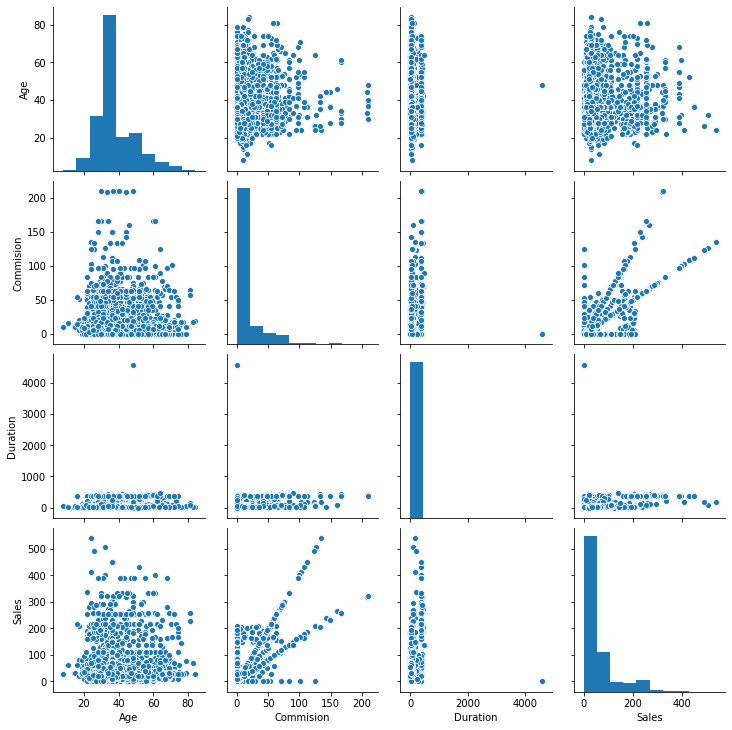

In [24]:
sns.pairplot(df)
fig.set_size_inches(12, 7)

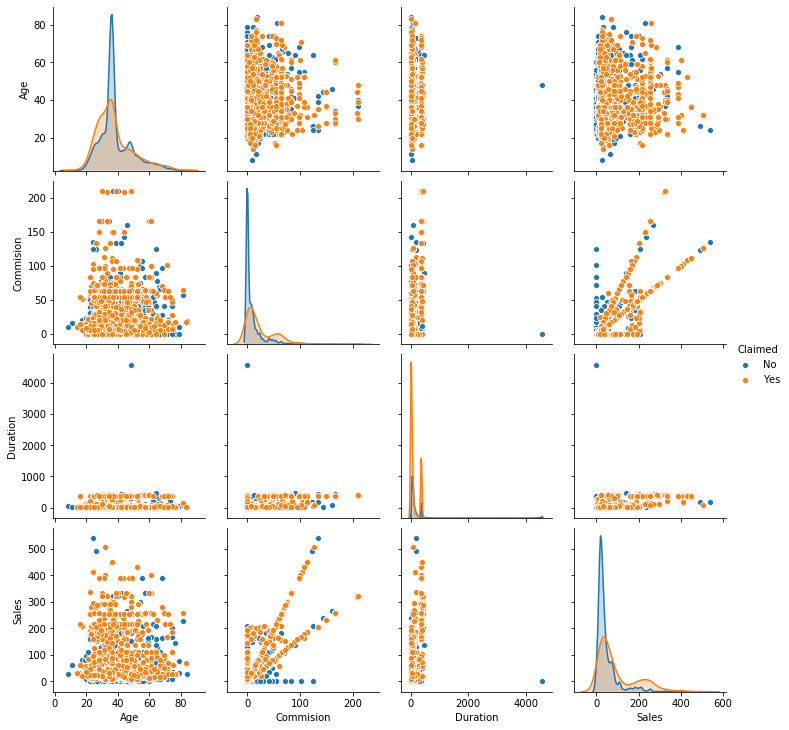

In [25]:
sns.pairplot(df , hue ='Claimed')
fig.set_size_inches(12, 7)

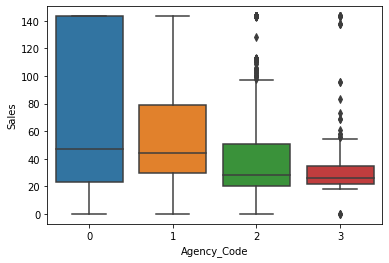

In [74]:
sns.boxplot(x="Agency_Code", y="Sales", data=df)

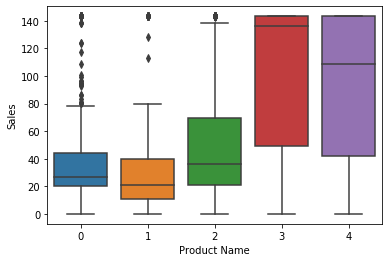

In [75]:
sns.boxplot(x="Product Name", y="Sales", data=df)

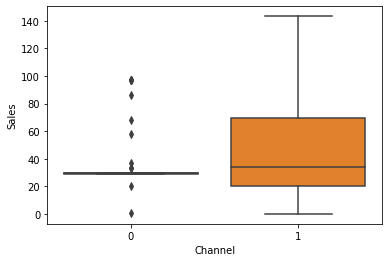

In [76]:
sns.boxplot(x="Channel", y="Sales", data=df)

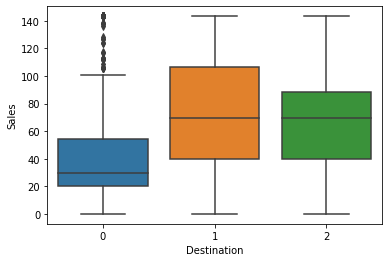

In [77]:
sns.boxplot(x="Destination", y="Sales", data=df)

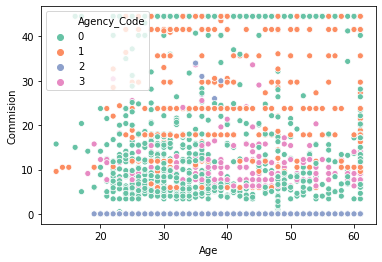

In [64]:
sns.scatterplot(df['Age'], df['Commision'], hue=df['Agency_Code'],palette='Set2') 

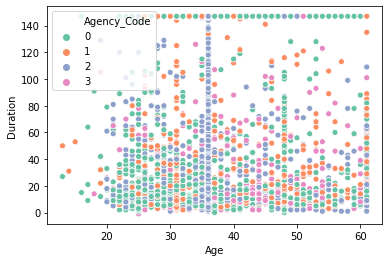

In [56]:
sns.scatterplot(df['Age'], df['Duration'], hue=df['Agency_Code'],palette='Set2') 

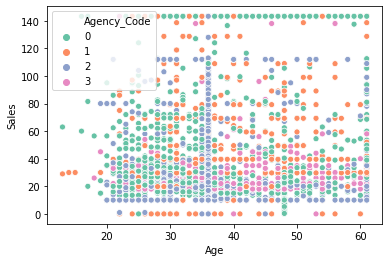

In [63]:
sns.scatterplot(df['Age'], df['Sales'], hue=df['Agency_Code'],palette='Set2') 

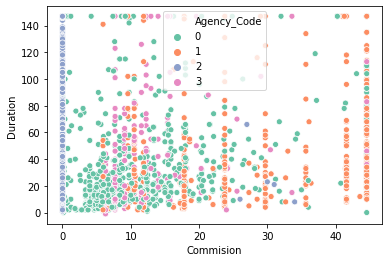

In [62]:
sns.scatterplot(df['Commision'], df['Duration'], hue=df['Agency_Code'],palette='Set2') 

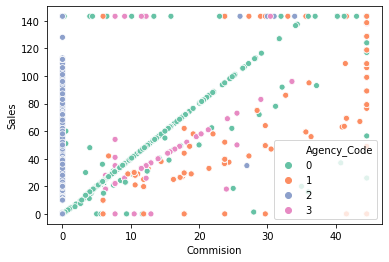

In [66]:
sns.scatterplot(df['Commision'], df['Sales'], hue=df['Agency_Code'],palette='Set2') 

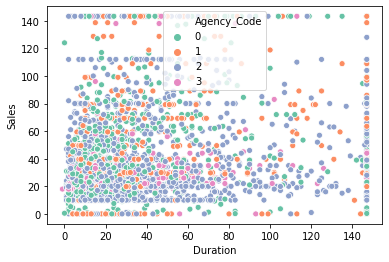

In [67]:
sns.scatterplot(df['Duration'], df['Sales'], hue=df['Agency_Code'],palette='Set2') 

In [45]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range =  Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [46]:
lratio,uratio=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']>uratio,uratio,df['Age'])
df['Age']=np.where(df['Age']<lratio,lratio,df['Age'])

lraxis,uraxis=remove_outlier(df['Commision'])
df['Commision']=np.where(df['Commision']>uraxis,uraxis,df['Commision'])
df['Commision']=np.where(df['Commision']<lraxis,lraxis,df['Commision'])

lra,ura=remove_outlier(df['Duration'])
df['Duration']=np.where(df['Duration']>ura,ura,df['Duration'])
df['Duration']=np.where(df['Duration']<lra,lra,df['Duration'])

lrs,urs=remove_outlier(df['Sales'])
df['Sales']=np.where(df['Sales']>urs,urs,df['Sales'])
df['Sales']=np.where(df['Sales']<lrs,lrs,df['Sales'])

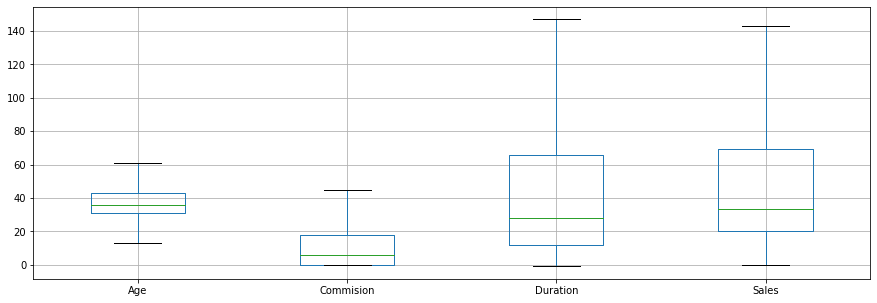

In [47]:
df.boxplot(figsize=(15,5))

In [48]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   float64
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 208.5 KB


In [50]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


In [68]:
df.describe(include="all")

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
count,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000
mean,37.896190,1.280671,0.597344,11.756865,0.983922,47.339042,51.085089,1.666550,0.261797
std,9.821593,1.003773,0.490518,15.502632,0.125799,47.297767,42.604294,1.277822,0.586239
min,13.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,1.000000,12.000000,20.000000,1.000000,0.000000
50%,36.000000,2.000000,1.000000,5.630000,1.000000,28.000000,33.500000,2.000000,0.000000
75%,43.000000,2.000000,1.000000,17.820000,1.000000,66.000000,69.300000,2.000000,0.000000
max,61.000000,3.000000,1.000000,44.550000,1.000000,147.000000,143.250000,4.000000,2.000000


In [ ]:
sns.scatterplot(df['Age'], df['Commision'], hue=df['Agency_Code']) 

In [51]:
df.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

In [52]:
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0.00,1,34.0,20.00,2,0
2,39.0,1,1,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0.00,1,4.0,26.00,1,0
4,33.0,3,0,6.30,1,53.0,18.00,0,0


# Decision Tree Classifier

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [35]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


In [36]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [8,10], 
    'min_samples_leaf': [30,60,80], 
    'min_samples_split': [90,180,240],
}

dtcl = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [37]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 30, 'min_samples_split': 240}


DecisionTreeClassifier(max_depth=8, min_samples_leaf=30, min_samples_split=240)

In [38]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.577919
Sales         0.295588
Product Name  0.045580
Commision     0.034381
Duration      0.033316
Age           0.013216
Type          0.000000
Channel       0.000000
Destination   0.000000


In [39]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [40]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.573171,0.426829
1,0.971223,0.028777
2,0.361702,0.638298
3,0.837500,0.162500
4,0.837500,0.162500


AUC and ROC for the training data

AUC: 0.816


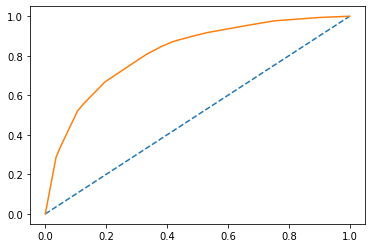

In [41]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC and ROC for the test data

AUC: 0.792


Text(0.5, 1.0, 'ROC')

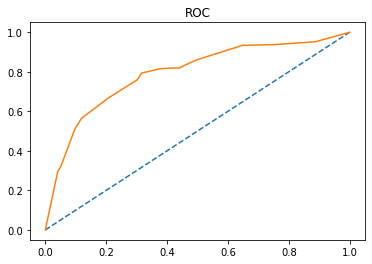

In [42]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.title('ROC')

Confusion Matrix for the training data

In [43]:
confusion_matrix(train_labels, ytrain_predict)

array([[1215,  144],
       [ 308,  335]], dtype=int64)

In [44]:
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7742257742257742

In [45]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1359
           1       0.70      0.52      0.60       643

    accuracy                           0.77      2002
   macro avg       0.75      0.71      0.72      2002
weighted avg       0.77      0.77      0.76      2002



In [46]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.7
cart_train_recall  0.52
cart_train_f1  0.6


Confusion Matrix for test data

In [47]:
confusion_matrix(test_labels, ytest_predict)

array([[531,  57],
       [133, 138]], dtype=int64)

In [48]:
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7788125727590222

In [49]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       588
           1       0.71      0.51      0.59       271

    accuracy                           0.78       859
   macro avg       0.75      0.71      0.72       859
weighted avg       0.77      0.78      0.77       859



# Cart Conclusion

Train Data:  
    AUC: 82%        
    Accuracy: 77%        
    Sensitivity: 52%     
    Precision: 70%        
    f1-Score: 60%       
            
Test Data:      
    AUC: 79%      
    Accuracy:78%      
    Sensitivity: 51%    
    Precision: 71%       
    f1-Score: 59%  

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
  
Agency_Code is the most important variable for predicting claim status

# Random Forest Classifier

In [51]:
param_grid = {
    'max_depth': [8,10],
    'max_features': [4,6,8],
    'min_samples_leaf': [30,60,90],
    'min_samples_split': [90,180,270],
    'n_estimators': [150,200]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [52]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10], 'max_features': [4, 6, 8],
                         'min_samples_leaf': [30, 60, 90],
                         'min_samples_split': [90, 180, 270],
                         'n_estimators': [150, 200]})

In [53]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_leaf': 30,
 'min_samples_split': 90,
 'n_estimators': 200}

In [54]:
best_grid = grid_search.best_estimator_

In [55]:
best_grid

RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=30,
                       min_samples_split=90, n_estimators=200)

In [56]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

# RF Model Performance Evaluation on Training data

In [57]:
confusion_matrix(train_labels,ytrain_predict)

array([[1192,  167],
       [ 263,  380]], dtype=int64)

In [58]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.7852147852147852

In [59]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1359
           1       0.69      0.59      0.64       643

    accuracy                           0.79      2002
   macro avg       0.76      0.73      0.74      2002
weighted avg       0.78      0.79      0.78      2002



In [60]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.69
rf_train_recall  0.59
rf_train_f1  0.64


Area under Curve is 0.7340476541963775


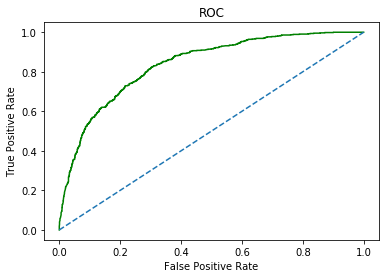

In [61]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

# RF Model Performance Evaluation on Test data

In [62]:
confusion_matrix(test_labels,ytest_predict)

array([[516,  72],
       [114, 157]], dtype=int64)

In [63]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7834691501746216

In [64]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       588
           1       0.69      0.58      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [65]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.69
rf_test_recall  0.58
rf_test_f1  0.63


Area under Curve is 0.7284434068830483


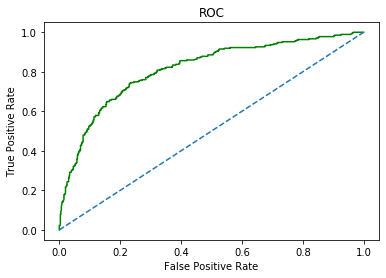

In [66]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

In [67]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.449352
Sales         0.242141
Product Name  0.154949
Duration      0.064199
Commision     0.044093
Age           0.039100
Destination   0.005400
Type          0.000767
Channel       0.000000


# Random Forest Conclusion

Train Data 
    AUC: 73%        
    Accuracy: 79%        
    Sensitivity: 59%     
    Precision: 69%        
    f1-Score: 64%       
            
   Test Data      
    AUC: 73%      
    Accuracy: 78%      
    Sensitivity: 58%    
    Precision: 69%       
    f1-Score: 63%     

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
  
Agency_Code  is again the most important variable for predicting claim status

# Building a Neural Network Classifier

In [246]:
param_grid = {
    'hidden_layer_sizes': [100,150,200],
    'max_iter': [1000,1500,2000], 
    'solver': ['adam'], 
    'tol': [0.01],
}

nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [247]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 200, 'max_iter': 1000, 'solver': 'adam', 'tol': 0.01}

In [248]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=200, max_iter=1000, tol=0.01)

# Predicting the Training and Testing data

In [249]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

# Neural Network Model Performance Evaluation on Training data

In [250]:
confusion_matrix(train_labels,ytrain_predict)

array([[1159,  200],
       [ 275,  368]], dtype=int64)

In [251]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7627372627372627

In [252]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1359
           1       0.65      0.57      0.61       643

    accuracy                           0.76      2002
   macro avg       0.73      0.71      0.72      2002
weighted avg       0.76      0.76      0.76      2002



In [253]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.65
nn_train_recall  0.57
nn_train_f1  0.61


Area under Curve is 0.7125751141231146


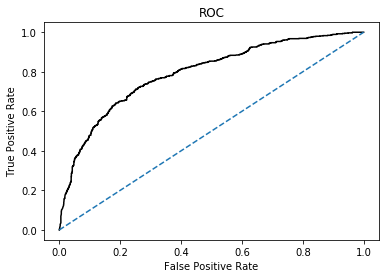

In [254]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', nn_train_auc)

# Neural Network Model Performance Evaluation on Test data

In [255]:
confusion_matrix(test_labels,ytest_predict)

array([[512,  76],
       [122, 149]], dtype=int64)

In [256]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7694994179278231

In [257]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       588
           1       0.66      0.55      0.60       271

    accuracy                           0.77       859
   macro avg       0.73      0.71      0.72       859
weighted avg       0.76      0.77      0.76       859



In [258]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][1],2)
nn_test_recall=round(df.loc["1"][2],2)
nn_test_f1=round(df.loc["1"][0],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.55
nn_test_recall  0.6
nn_test_f1  0.66


Area under Curve is 0.7102818987373546


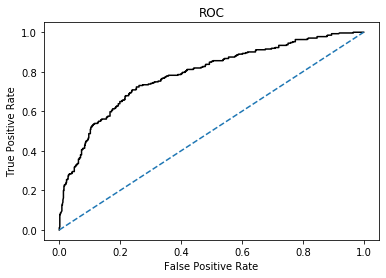

In [259]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', nn_test_auc)

In [260]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=200, max_iter=1000, tol=0.01)>

# Neural Network Conclusion

   Train Data:  
    AUC: 71%        
    Accuracy: 76%        
    Sensitivity: 57%     
    Precision: 65%        
    f1-Score: 61%       
            
   Test Data:      
    AUC: 71%      
    Accuracy: 77%      
    Sensitivity: 60%    
    Precision: 55%       
    f1-Score: 66%     
   
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

# Final Conclusion

# Comparison of the performance metrics from the 3 models

In [261]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.77,0.78,0.79,0.78,0.76,0.77
AUC,0.82,0.79,0.73,0.73,0.71,0.71
Recall,0.52,0.51,0.59,0.58,0.57,0.60
Precision,0.70,0.71,0.69,0.69,0.65,0.55
F1 Score,0.60,0.59,0.64,0.63,0.61,0.66


# ROC Curve for the 3 models on the Training data

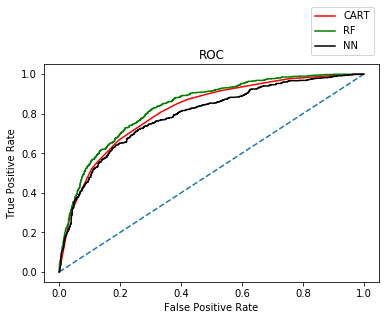

In [262]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr,cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")

plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# ROC Curve for the 3 models on the Test data

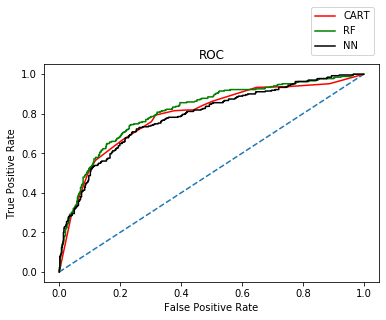

In [263]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')